In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('exams.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
print("Назви колонок:", data.columns)
print("Розмір датасету:", data.shape)

Назви колонок: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Розмір датасету: (1000, 8)


In [5]:
print("Кількість пропусків у кожній колонці:\n", data.isnull().sum())

Кількість пропусків у кожній колонці:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               3                            4      1   
1       1               3                            0      1   
2       0               3                            4      0   
3       1               1                            4      0   
4       0               3                            0      1   

   test preparation course  math score  reading score  writing score  
0                        0          59             70             78  
1                        1          96             93             87  
2                        1          57             76             77  
3                        1          70             70             63  
4                        1          83             85             86  


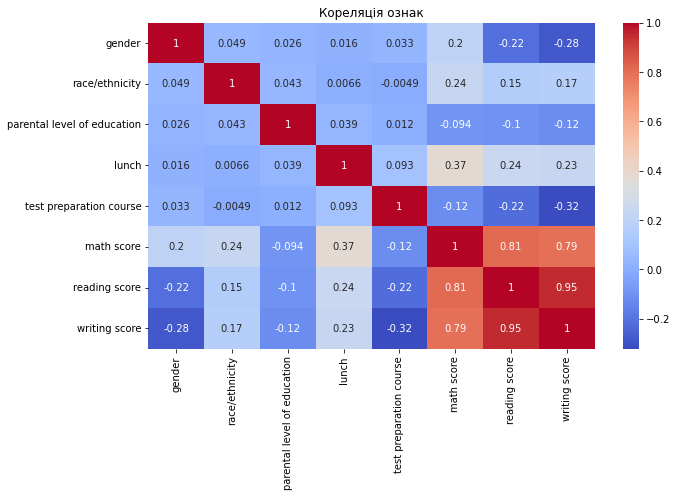

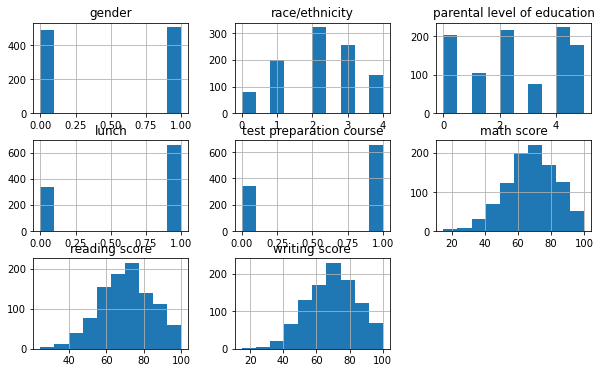

In [7]:
# Heatmap кореляції
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Кореляція ознак')
plt.show()

# Побудова гістограм
data.hist(bins=10, figsize=(10, 6))
plt.show()


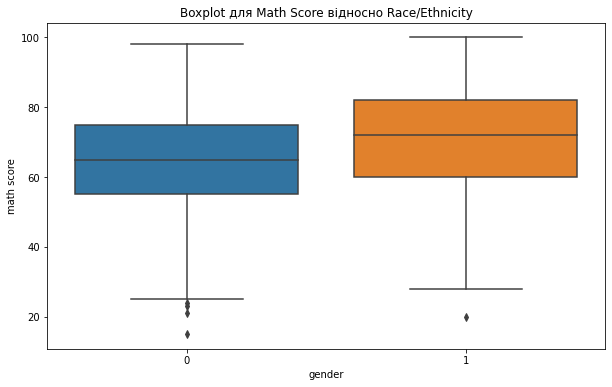

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=data)
plt.title('Boxplot для Math Score відносно Race/Ethnicity')
plt.show()

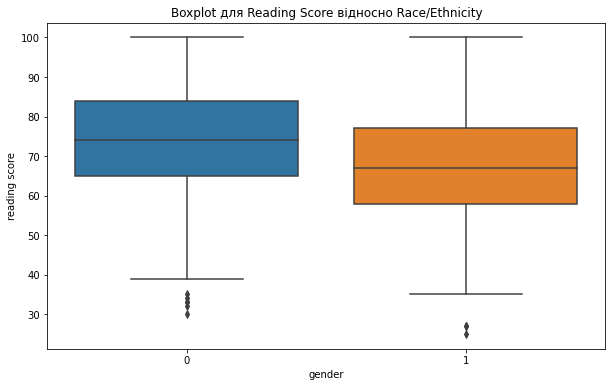

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='reading score', data=data)
plt.title('Boxplot для Reading Score відносно Race/Ethnicity')
plt.show()

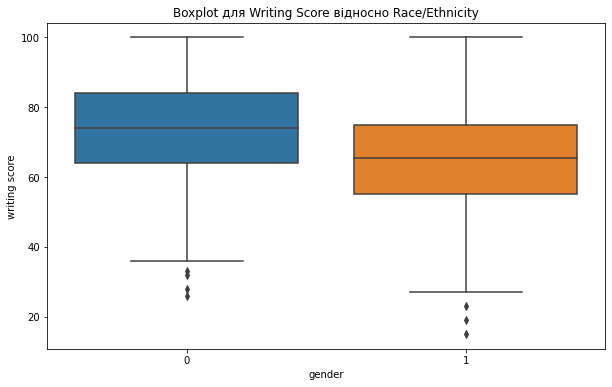

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='writing score', data=data)
plt.title('Boxplot для Writing Score відносно Race/Ethnicity')
plt.show()

In [11]:
scaler = StandardScaler()
numeric_columns = ['math score', 'reading score', 'writing score']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [12]:
X = data.drop(columns=['gender']) 
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



models = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}


results = {}

for name, model in models.items():
    print(f"\n\nНавчання моделі: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    results[name] = {
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    
    # Виведення метрик
    print(f"\nРезультати для моделі: {name}")
    print("Classification Report:")
    print(results[name]['classification_report'])
    
    print("\nConfusion Matrix:")
    print(results[name]['confusion_matrix'])

print("\nУсі моделі завершили навчання та оцінку.")



Навчання моделі: kNN

Результати для моделі: kNN
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        95
           1       0.78      0.82      0.80       105

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200


Confusion Matrix:
[[71 24]
 [19 86]]


Навчання моделі: Decision Tree

Результати для моделі: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        95
           1       0.86      0.86      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200


Confusion Matrix:
[[80 15]
 [15 90]]


Навчання моделі: SVM

Результати для моделі: SVM
Classification Report:
              precision    r

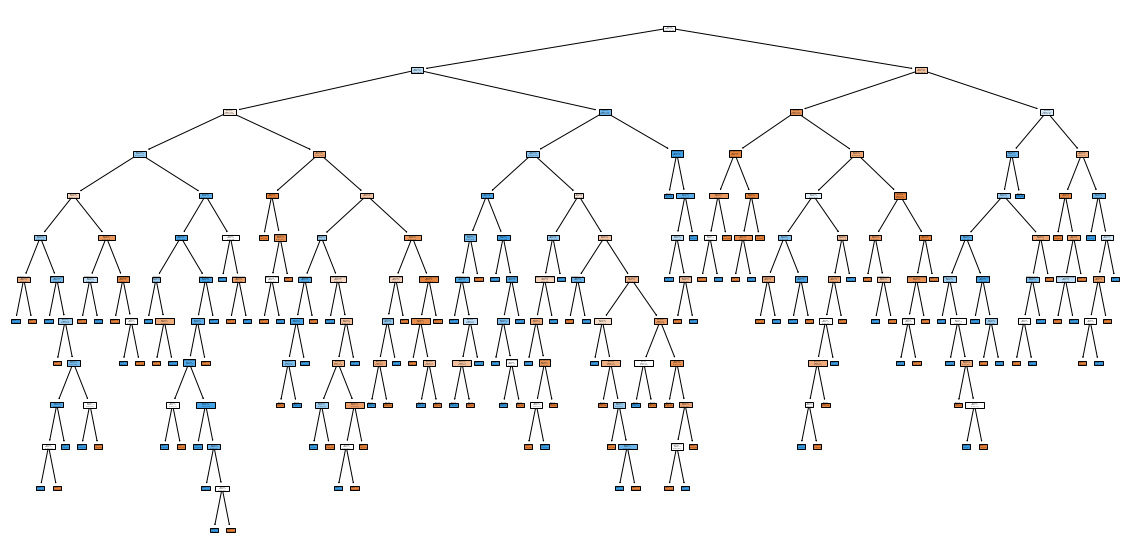

In [18]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns)
plt.show()

In [13]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Найкращі параметри для kNN:", grid_search.best_params_)

Найкращі параметри для kNN: {'n_neighbors': 9}


In [14]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Найкращі параметри для SVM:", grid_search.best_params_)

Найкращі параметри для SVM: {'C': 10, 'gamma': 0.01}


In [15]:
# Найкраща модель після GridSearch для kNN
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
print("\nРезультати для оптимальної моделі kNN:")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Результати для оптимальної моделі kNN:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.95      0.93      0.94       105

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
[[90  5]
 [ 7 98]]


In [16]:
# Найкраща модель після GridSearch для SVM
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
print("\nРезультати для оптимальної моделі SVM:")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Результати для оптимальної моделі SVM:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.95      0.93      0.94       105

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
[[90  5]
 [ 7 98]]
